In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
x_train=pd.read_csv("Logistic_X_Train.csv")

In [4]:
print(x_train.head())

         f1        f2
0  0.574727  0.787277
1  0.251502  0.908940
2  1.860578  0.013763
3  0.019477  1.047210
4  0.029794  0.252236


In [5]:
y_train=pd.read_csv("Logistic_Y_Train.csv")

In [6]:
print(y_train.head())

   label
0      0
1      0
2      1
3      0
4      1


In [26]:
xT=x_train.values
yT=y_train.values
print(xT[:3])
print(yT[:3])

[[0.57472742 0.78727745]
 [0.25150169 0.90893952]
 [1.86057846 0.01376293]]
[[0]
 [0]
 [1]]


In [31]:
print(np.max(xT))
print(np.min(xT))
print(xT.shape)

2.4435708019866
-1.4248117761873722
(2250, 2)


In [33]:
x_test=pd.read_csv("Logistic_X_Test.csv")
xt=x_test.values
print(xt.shape)

(750, 2)


In [ ]:
# import tensorflow as tf 
# tf.keras.utils.normalize(xT,axis=)

In [46]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [47]:
xT=sc.fit_transform(xT)

In [48]:
print(xT[:3])
print(np.max(xT))
print(np.min(xT))

[[ 0.08011522  1.0044578 ]
 [-0.28580958  1.23476247]
 [ 1.53583096 -0.45979482]]
2.2357531821855794
-2.323500723465077


In [58]:
from mpl_toolkits import mplot3d

In [57]:
# fig=plt.figure()
# ax=plt.axes(projection="3d")
# ax.plot3D(xT[:100,0],xT[:100,1],y_train[:100])
# plt.show()

ValueError: input operand has more dimensions than allowed by the axis remapping

In [43]:
from keras.models import Sequential
from keras.layers import Dense

In [93]:
model=Sequential()
model.add(Dense(2,activation="relu",input_shape=(2,)))
model.add(Dense(16,activation="relu"))
model.add(Dense(16,activation="relu"))
# model.add(Dense(4,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [94]:
print(model.summary())

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_28 (Dense)             (None, 16)                48        
_________________________________________________________________
dense_29 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 17        
Total params: 343
Trainable params: 343
Non-trainable params: 0
_________________________________________________________________
None


In [95]:
model.compile(metrics=["accuracy"],loss="binary_crossentropy",optimizer="adam")

In [61]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

In [96]:
checkpoint=ModelCheckpoint("best_model.h5",monitor="val_loss",save_best_only=True)

In [97]:
earlystop=EarlyStopping(monitor="val_accuracy",patience=2)

In [98]:
hist=model.fit(xT,yT,epochs=20,batch_size=256,validation_split=0.3,callbacks=[earlystop,checkpoint])

Epoch 1/20
7/7 [==============================] - 1s 120ms/step - loss: 0.6540 - accuracy: 0.5600 - val_loss: 0.6439 - val_accuracy: 0.8519
Epoch 2/20
7/7 [==============================] - 0s 42ms/step - loss: 0.6343 - accuracy: 0.8260 - val_loss: 0.6256 - val_accuracy: 0.8430
Epoch 3/20
7/7 [==============================] - 0s 28ms/step - loss: 0.6157 - accuracy: 0.8216 - val_loss: 0.6078 - val_accuracy: 0.8415


In [65]:
h=hist.history

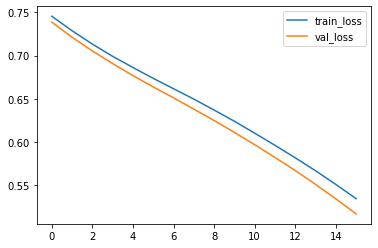

In [99]:
plt.plot(h["loss"],label="train_loss")
plt.plot(h["val_loss"],label="val_loss")
plt.legend()
plt.show()

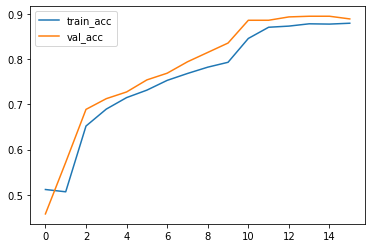

In [90]:
plt.plot(h["accuracy"],label="train_acc")
plt.plot(h["val_accuracy"],label="val_acc")
plt.legend()
plt.show()

In [92]:
model.evaluate(xT,yT) 

71/71 [==============================] - 0s 3ms/step - loss: 0.5339 - accuracy: 0.8387


[0.5339288711547852, 0.8386666774749756]